In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:

# load dataset
df = pd.read_csv("C:/Users/User/Downloads/bank csv.csv")

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
print("Initial Shape:", df.shape)
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Initial Shape: (41188, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euri

In [17]:
# remove duration column
if 'duration' in df.columns:
    df.drop('duration', axis=1, inplace=True)


In [19]:
# Count 'unknown' values
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col][df[col] == 'unknown'].count()}")

job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


In [21]:
# Replace unknown values with mode 
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_val)


In [23]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col][df[col] == 'unknown'].count()}")

job: 0
marital: 0
education: 0
default: 0
housing: 0
loan: 0
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


In [25]:
# Rename column y
df.rename(columns={'y': 'subscribed'}, inplace=True)

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [27]:
#Convert 'yes'/'no' to 1/0
df['subscribed'] = df['subscribed'].map({'yes': 1, 'no': 0})


In [29]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [31]:
#  Scale numerical columns
num_cols = ['age', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [33]:
# Final check
print("\nFinal Shape:", df.shape)
print(df.head())
print(df.info())




Final Shape: (41188, 47)
        age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0  1.533034 -0.565922  0.195414 -0.349494      0.648092        0.722722   
1  1.628993 -0.565922  0.195414 -0.349494      0.648092        0.722722   
2 -0.290186 -0.565922  0.195414 -0.349494      0.648092        0.722722   
3 -0.002309 -0.565922  0.195414 -0.349494      0.648092        0.722722   
4  1.533034 -0.565922  0.195414 -0.349494      0.648092        0.722722   

   cons.conf.idx  euribor3m  nr.employed  subscribed  ...  month_may  \
0       0.886447    0.71246      0.33168           0  ...       True   
1       0.886447    0.71246      0.33168           0  ...       True   
2       0.886447    0.71246      0.33168           0  ...       True   
3       0.886447    0.71246      0.33168           0  ...       True   
4       0.886447    0.71246      0.33168           0  ...       True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      

In [35]:

print("\nTarget Distribution:")
print(df['subscribed'].value_counts(normalize=True))


Target Distribution:
subscribed
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [37]:
# check for duplicates 
df.duplicated().sum()


2109

In [39]:
# Remove duplicates 
df = df.drop_duplicates()


In [41]:
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (39079, 47)


In [43]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)


Numeric columns: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']


In [45]:
# Removing target column from numeric columns
numeric_cols = [col for col in numeric_cols if col != 'subscribed']
print("Final numeric columns to check for outliers:", numeric_cols)


Final numeric columns to check for outliers: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [47]:
# Apply IQR method to remove outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    print(f"{col}: Removed {before - after} outliers")

age: Removed 457 outliers
campaign: Removed 2381 outliers
pdays: Removed 1401 outliers
previous: Removed 3839 outliers
emp.var.rate: Removed 1602 outliers
cons.price.idx: Removed 0 outliers
cons.conf.idx: Removed 0 outliers
euribor3m: Removed 6133 outliers
nr.employed: Removed 0 outliers


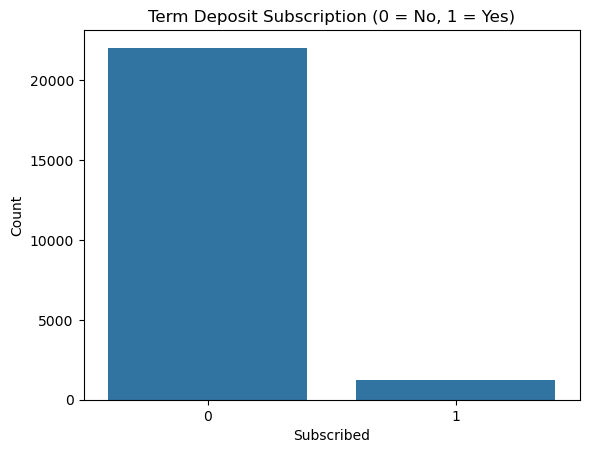

In [49]:
sns.countplot(data=df, x='subscribed')
plt.title("Term Deposit Subscription (0 = No, 1 = Yes)")
plt.xlabel("Subscribed")
plt.ylabel("Count")
plt.show()

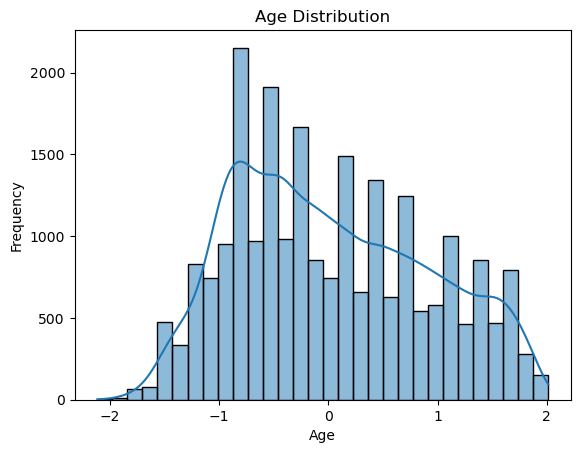

In [51]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Model Building & Performance Evaluation (Visualization)




In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Step 1: Separate features and target
X = df.drop('subscribed', axis=1)
y = df['subscribed']



In [87]:
# Step 2: Apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



In [89]:
# Step 4: Train Logistic Regression with class_weight
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Step 5: Evaluate Logistic Regression
print("\n[Logistic Regression Results]")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))





[Logistic Regression Results]
Accuracy: 0.6860966205488773
Confusion Matrix:
 [[2966 1439]
 [1329 3084]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68      4405
           1       0.68      0.70      0.69      4413

    accuracy                           0.69      8818
   macro avg       0.69      0.69      0.69      8818
weighted avg       0.69      0.69      0.69      8818



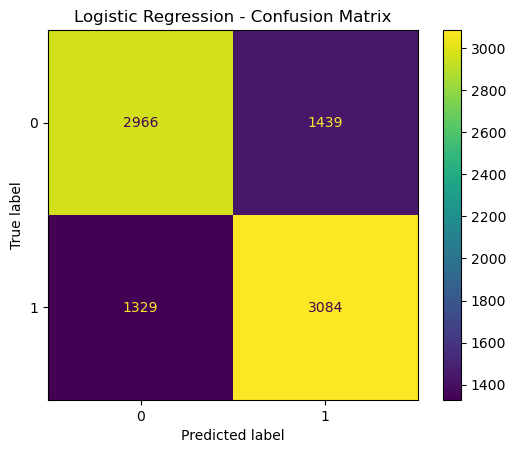

In [91]:
# Step 6: Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()



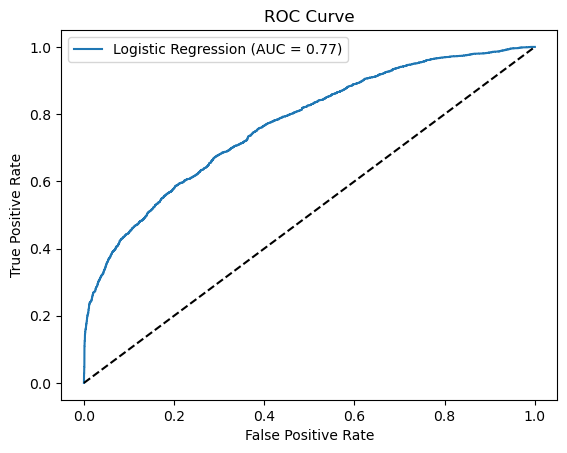

In [93]:
# Step 7: ROC Curve for Logistic Regression
y_proba_log = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_log)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



In [95]:
# Step 8: Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 9: Evaluate Random Forest
print("\n[Random Forest Results]")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))




[Random Forest Results]
Accuracy: 0.9623497391698798
Confusion Matrix:
 [[4261  144]
 [ 188 4225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4405
           1       0.97      0.96      0.96      4413

    accuracy                           0.96      8818
   macro avg       0.96      0.96      0.96      8818
weighted avg       0.96      0.96      0.96      8818



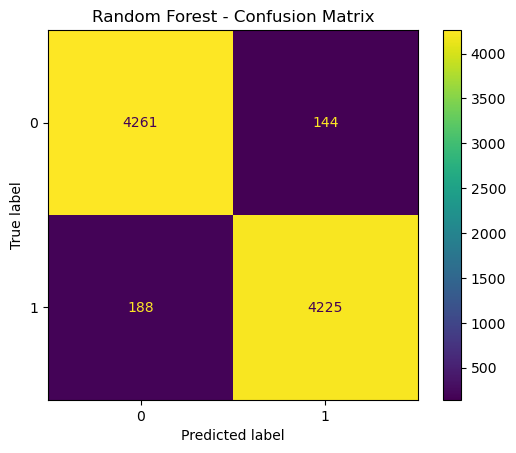

In [98]:
# Step 10: Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.show()



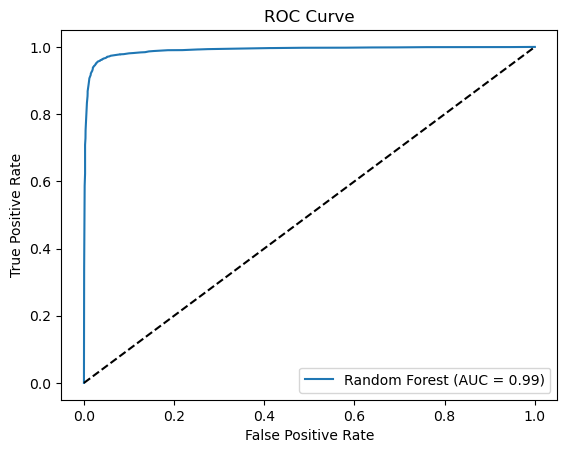

In [100]:
# Step 11: ROC Curve for Random Forest
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_rf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
### ✅ Final Conclusion

The goal of this project was to develop a machine learning model that predicts whether a customer will subscribe to a term deposit, based on personal, contact, and campaign-related information.

We followed a structured workflow:
- **Explored** and **cleaned** the dataset by handling missing values, duplicates, and outliers.
- **Balanced** the imbalanced data using **SMOTE** to ensure fair learning.
- **Split** the data into training and testing sets (80/20 split).
- **Trained** two models: Logistic Regression and Random Forest.
- **Evaluated** both models using Accuracy, Confusion Matrix, Classification Report, and ROC Curve.

📈 **Results:**
- **Random Forest** achieved the best performance with higher accuracy and better classification metrics compared to Logistic Regression.
- This model can be reliably used to predict customer behavior and assist marketing teams in targeting potential subscribers more effectively.

✅ This concludes that machine learning models, especially ensemble methods like Random Forest, can significantly enhance decision-making in targeted marketing campaigns.
